### 1. Import packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import regex as re
sns.set()
import pathlib
from pathlib import Path
import sys
sys.path.append("../src")
from matplotlib.ticker import FormatStrFormatter
from functions import year_object_count_df, sum_freq_per_year, year_freq_df, plot_graph, preprocess, get_Y_range # module with all functions used for the task

### 2. Read in data

In [3]:
data = pd.read_csv('RAAD_data_restructured.csv')

# changing empty origin_h2s to empty strings
data['origin_h2'] = data['origin_h2'].fillna('')

### 3. Prepare data

#### 3.1 Check in which columns numeric values are of an object type
#### 3.2 If found, convert objects into numeric values (float) 
This is essential for performing math operations with these variables

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1357 non-null   int64  
 1   site_number                  1357 non-null   int64  
 2   RAAD_type_number             1357 non-null   int64  
 3   RAAD_form                    1357 non-null   object 
 4   origin                       1357 non-null   object 
 5   contents                     1354 non-null   object 
 6   southampton_type_number      941 non-null    object 
 7   frequency                    1357 non-null   int64  
 8   origin_h1                    1357 non-null   object 
 9   origin_h2                    1357 non-null   object 
 10  raad_type_start_date         1157 non-null   float64
 11  raad_type_end_date           1157 non-null   float64
 12  site_name_modern             1357 non-null   object 
 13  site_name_acient  

#### 3.3 Clean text data (from punctuation, double spaces) and lowercase
This is done in order to avoid inconsistency in names, etc. Thus, to avoid errors while counting

The RAAD dataset is already pre-processed. For this reason, the following cell is commented. 

In [4]:
#data.columns

#cols_for_preprocessing = [
#    'RAAD_form', 
#    'origin', 
#    'contents',
#    'origin_h1', 
#    'origin_h2', 
#    'site_name_modern',
#    'site_name_acient', 
#    'modern_country', 
#    'roman_province',
#    'major_site_type', 
#    'minor_site_type', 
#    'quantification_method',
#    'quantification_abbreviation'
#    ]

#for i in cols_for_preprocessing:
#    data[i] = preprocess(data[i])


#data.head()

### 4. Subset data (Optional)
The code in the following chunks can be used to filter the data according to your wishes.

**Note:** The analysis in the remaining chunks will be done on the subset of the data. If you wish to investigate the full data, do not run the chunk, or make sure the lines are commented out (# in the begining of each line that you do not want to run). If you have created a subset of the data and wish to return to looking into the full data set, run the chunk in section 2 (data = pd.read_csv(.....))

#### 4.1 Subset according to quantification abbreviation
The quntification_abbreviation variable has 4 levels:
* 'total'
* 'max'
* 'mni'
* 'rbh'

Any of these can be inserted below, do only analyse data in which the quantification_abbreviation has a certain value.

In [3]:
# DATA ONLY INCLUDING ONE LEVEL OF QUANTIFICATION ABBREVIATION
#data = data[data['quantification_abbreviation'] == 'max']

# DATA INCLUDING TWO LEVELS OF QUANTIFICATION ABBREVIATION
#data = data[(data['quantification_abbreviation'] == 'max') | (data['quantification_abbreviation'] == 'total')]

#### 4.2 Subset according to major site type
The major_site_type variable has 3 levels:
* 'settlement'
* 'villa'
* 'military'
* 'settlement military'

Any of these can be inserted below, do only analyse data in which the major site type has a certain value.

In [4]:
# DATA ONLY INCLUDING ONE LEVEL OF MAJOR SITE TYPE
#data = data[data['major_site_type'] == 'villa']

# DATA INCLUDING TWO LEVELS OF MAJOR SITE TYPE
#data = data[(data['major_site_type'] == 'villa') | (data['major_site_type'] == 'military')]

#### 4.3 Check that the subsetting worked

It is always a good idea to make sure, that the data includes the wished for elements before moving on. The following code chunks can be used to see which values the columns we used to subset from includes. The head() function can be used to show the first *n* rows of the data.

**NOTE:** When you use the subsetted data to make further analysis in this notebook, make sure that the subsetted data you use, has the specified levels of certain variables you want to plot. For example, you cannot plot the frequency of of `origin_h1` if none of the remaining data has this value. 

In [10]:
# Checking major site type
data['major_site_type'].unique()

array(['settlement military', 'settlement', 'villa', 'military'],
      dtype=object)

In [11]:
# Checking quantification abbreviation
data['quantification_abbreviation'].unique()

array(['total', 'max', 'mni', 'rbh'], dtype=object)

In [4]:
data.head()

,Unnamed: 0,site_number,RAAD_type_number,RAAD_form,origin,contents,southampton_type_number,frequency,origin_h1,origin_h2,...,lat,long,major_site_type,minor_site_type,site_start_date,site_end_date,quantification_method,quantification_abbreviation,total_assemblage_size,reference
0,0,9,1,augst 48,em,unknown,NaN,1,em,,...,47.533512,7.71628,settlement military,colonia limitanei,-10,450,total sherds,total,5633,martinkilcher s 1987 die rˆmischen amphoren au...
1,1,9,2,augst 49,em,unknown,NaN,1,em,,...,47.533512,7.71628,settlement military,colonia limitanei,-10,450,total sherds,total,5633,martinkilcher s 1987 die rˆmischen amphoren au...
2,2,9,3,augst 55 agora f6566,em,wine,10,12,em,,...,47.533512,7.71628,settlement military,colonia limitanei,-10,450,total sherds,total,5633,martinkilcher s 1987 die rˆmischen amphoren au...
3,3,9,4,augst 56,em,unknown,NaN,2,em,,...,47.533512,7.71628,settlement military,colonia limitanei,-10,450,total sherds,total,5633,martinkilcher s 1987 die rˆmischen amphoren au...
4,4,9,5,augst 57,em,unknown,NaN,1,em,,...,47.533512,7.71628,settlement military,colonia limitanei,-10,450,total sherds,total,5633,martinkilcher s 1987 die rˆmischen amphoren au...


#### 4.4 Filtering away certain values of data
If for any reason, any data with a specific value in a certain column should be excluded from the analysis, the following code syntax can be used:

```
data = data[data['column_we_want_to_filter_by'] != 'value_it_should_not_have']
```

!= means not equal to. This signifies that we take all rows of the dataframe which does not have the value specified. 


In [ ]:
# Example, filtering away all rows where RAAD form is 'unknown'
#data = data[data['RAAD_form'] != 'unknown']

### 5. Show count of *site* per *origin* per *year* in RAAD type date range

#### 5.1 Identify the list of (non unique) *'Sites'* per *'RAAD form'* per *'origin'*

In [5]:
df = data.groupby(['RAAD_form', 'raad_type_start_date', 'raad_type_end_date', 'origin_h1'])['site_name_modern'].apply(lambda x: ','.join(x))
df = df.apply(lambda x: x.split(','))
df = df.reset_index()
df = df.rename(columns = {'site_name_modern':'List_of_sites'})
df.head()

,RAAD_form,raad_type_start_date,raad_type_end_date,origin_h1,List_of_sites
0,ac2,1.0,200.0,em,[neuss book]
1,africana i,150.0,300.0,northafrica,"[augst, dieburg, groﬂgerau, mainz, strasbourg ..."
2,africana ii,150.0,300.0,northafrica,"[augst, bad kreuznach, mainz, bavay]"
3,africana iia grande keay 24,150.0,300.0,northafrica,"[mainz, strasbourg lhomme de fer, trier kaiser..."
4,africana iic,250.0,300.0,northafrica,[strasbourg lhomme de fer]


#### 5.2 Count sites per origin per year
This needs to be done for all the levels of origin that should be included in the final plot. If for example, you want three different origins (e.g., EM, Gaul, Italy), three different frequency site_count data frames should be made. 

In [6]:
em = year_object_count_df(data = df[df['origin_h1'] == 'em'], 
                          lower_date = 'raad_type_start_date',  
                          upper_date = 'raad_type_end_date',
                          object_list = 'List_of_sites')    

In [7]:
northafrica = year_object_count_df(data = df[df['origin_h1'] == 'northafrica'], 
                                   lower_date = 'raad_type_start_date',  
                                   upper_date = 'raad_type_end_date',
                                   object_list = 'List_of_sites')    

### 6. Plot the graphs

#### 6.1 Create a dictionary for plotting
Now a dictionary containing the above dataframes is made. The keys (what is incapsulated in '') are going to be the labels for the plot. The variables refered to, are the dataframes created just above. 

In [8]:
df_dictionary = {'EM': em, 'North Africa': northafrica}

### 6.2 Plot and save

Here the data from the previously created count data frames are plotted. 

This is done using the function `plotgraph()`. 

To change the colour of lines, pass a list of strings with colour names to `palette` argument. 

To change the default `'solid'` line, pass f.ex., `'dashed'` to `linestyle` argument.o not show 

To hide values on axis uncomment `ax.axes.xaxis.set_ticks([])` for X and `ax.axes.yaxis.set_ticks([])` for Y.

To plot a single line graph specify only 1 axes in this line `fig, ax = plt.subplots(figsize=(20, 11))` and use this `ax` variable as an input for `ax` argument in `plotgraph()`. 
To plot 2 and more graphs side by side:
1. specify that many axes as graphs and the respective number of rows/columns of the subplot grid. F.ex., to plot 2 lie=ne graphs `fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20, 11))`
2. call `plot_graph()` on each `dictionary` and use the respective `ax` variable as an input for `ax` argument in `plotgraph()`.  
F.ex., in `plot_graph(dicts_of_df = df_dictionary, palette=['yellow', 'green'], linestyle = 'dashed', ax = ax1)` the line graph for dic with Gaul and Italy will be refered as `ax1` and placed on the **right** side of the graph.

**Note**: Remember to set labels, background colour, etc for both axes like in the example below.

/tmp/ipykernel_37811/2301688302.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


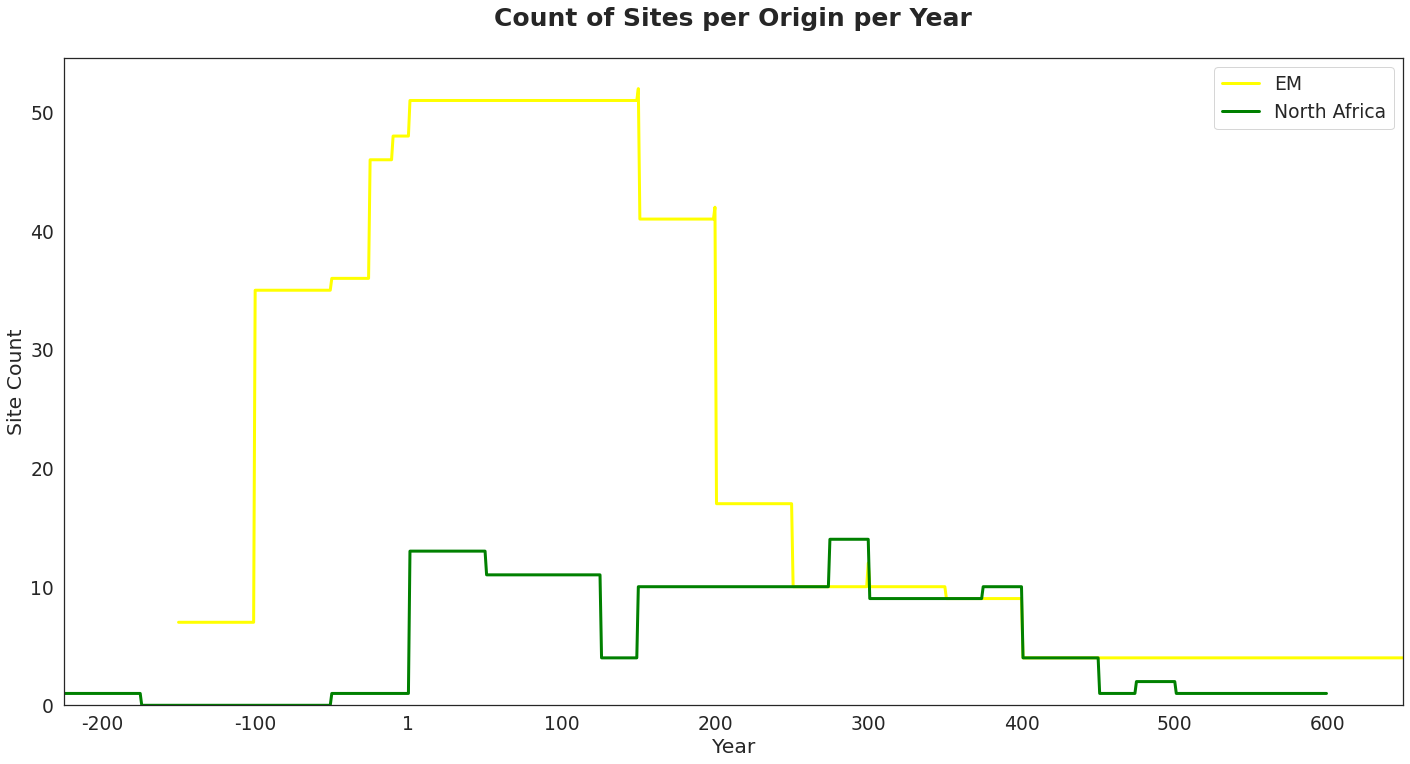

In [9]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['yellow', 'green'],  
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)

#Change background colour
ax.set_facecolor("white")  

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Site Count")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

ax.set_title(label = 'Count of Sites per Origin per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()



# Save the graph
plt.savefig('./site_count.pdf')

### 7. Show sum of *Frequency* per *origin* per *year* for the least specific level of origin (e.g. EM, Gaul, Italy)

#### 7.1 Group *RAAD form* by *origin* and sum frequencies

In [10]:
df0 = data.groupby(['origin_h1', 'RAAD_form', 'raad_type_start_date', 'raad_type_end_date'])['frequency'].sum()
df0 = df0.reset_index()
df0 = df0.rename(columns = {'frequency':'summed_freq'})
df0.head()

,origin_h1,RAAD_form,raad_type_start_date,raad_type_end_date,summed_freq
0,em,ac2,1.0,200.0,1
1,em,augst 46,50.0,100.0,1
2,em,augst 47,150.0,300.0,8
3,em,augst 49,1.0,100.0,1
4,em,augst 55 agora f6566,-50.0,400.0,12


#### 7.2 Calculate *raad form* frequency per year

In [11]:
df1 = sum_freq_per_year(data = df0,
                        sum_freq = 'summed_freq',
                        lower_date = 'raad_type_start_date',
                        upper_date = 'raad_type_end_date')

df1.head()

,origin_h1,RAAD_form,raad_type_start_date,raad_type_end_date,summed_freq,Sum_freq_per_year
0,em,ac2,1.0,200.0,1,0.005025
1,em,augst 46,50.0,100.0,1,0.020000
2,em,augst 47,150.0,300.0,8,0.053333
3,em,augst 49,1.0,100.0,1,0.010101
4,em,augst 55 agora f6566,-50.0,400.0,12,0.026667


#### 7.3 Create a two-column dataframe with years and frequency values
This needs to be done for all the levels of origin that should be included in the final plot. If for example, you want three different origins (e.g., EM, Gaul, Italy), three different frequency data frames should be made. 

It is also possible to plot a line, which sums of serveral levels of the variable. This can be done using the following syntax:

`freq_df = year_freq_df(df1[(df1['origin_h1'] == 'em') | (df1['origin_h1'] == 'gaul')]`


In [12]:
freq_em = year_freq_df(data = df1[df1['origin_h1'] == 'em'],     # param for specifying the origin 
                       lower_date = 'raad_type_start_date',
                       upper_date = 'raad_type_end_date',
                       sum_freq = 'Sum_freq_per_year')   

In [13]:
freq_gaul = year_freq_df(data = df1[df1['origin_h1'] == 'gaul'],     # param for specifying the origin 
                         lower_date = 'raad_type_start_date',
                         upper_date = 'raad_type_end_date',
                         sum_freq = 'Sum_freq_per_year')   

#### 7.4 Plot the graphs

#### 7.4.1 Create a dictionary for plotting

In [14]:
df_dictionary = {'EM': freq_em, 'Gaul': freq_gaul}

#### 7.4.2 Plot and save

/tmp/ipykernel_37811/4094909811.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


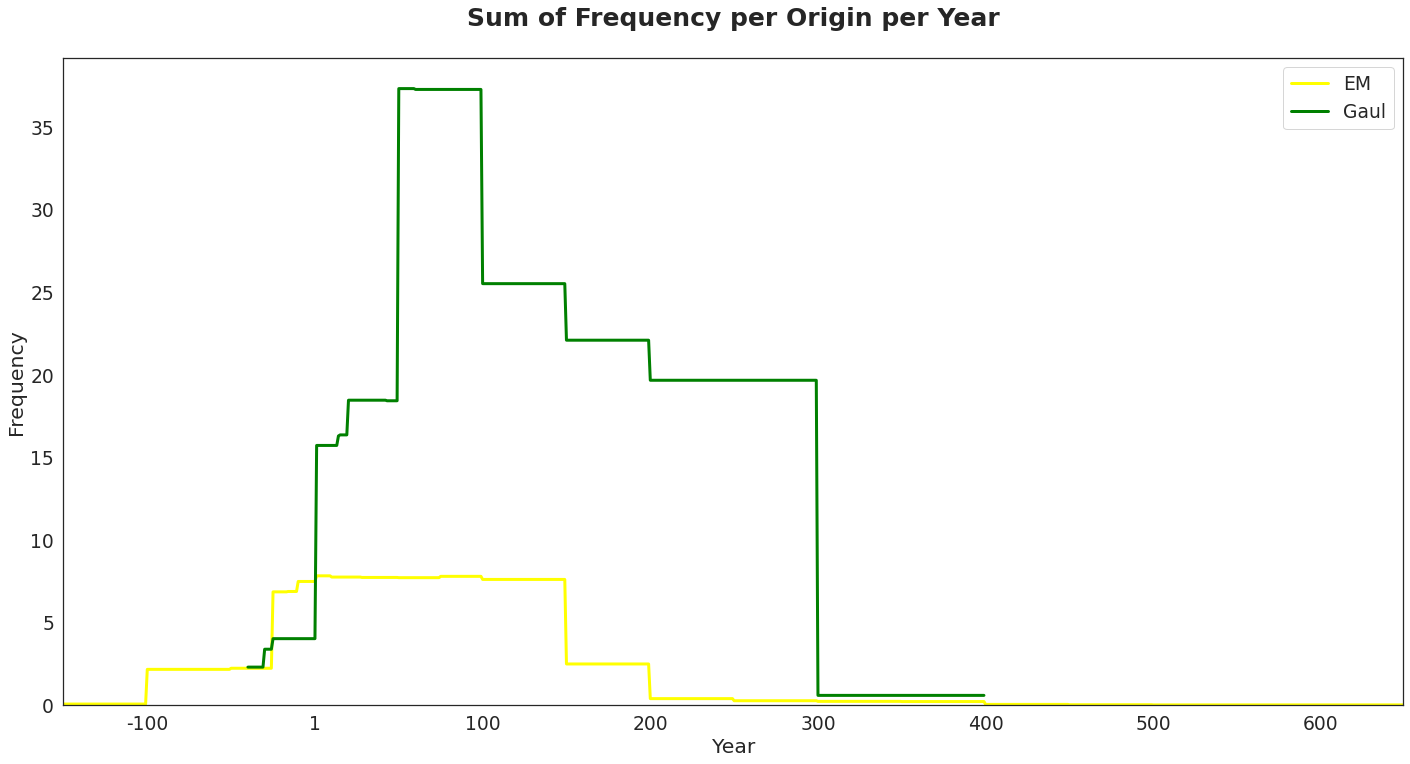

In [15]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['yellow', 'green'],  
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)

#Change background colour
ax.set_facecolor("white")  

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

ax.set_title(label = 'Sum of Frequency per Origin per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()



# Save the graph
plt.savefig('./frequency_per_year.pdf')

### 8. Show sum of *frequency* per *origin* per *year* for the specific level of *origin* (e.g., Frejus, Lyon, Switzerland) 

#### 8.1 Group *RAAD form* by *origin_h2* and sum frequencies

In [16]:
df0 = data.groupby(['origin_h2', 'RAAD_form', 'raad_type_start_date', 'raad_type_end_date'])['frequency'].sum()
df0 = df0.reset_index()
df0 = df0.rename(columns = {'frequency':'summed_freq'})
df0.head()

,origin_h2,RAAD_form,raad_type_start_date,raad_type_end_date,summed_freq
0,,africana i,150.0,300.0,20
1,,africana ii,150.0,300.0,11
2,,africana iia grande keay 24,150.0,300.0,5
3,,africana iic,250.0,300.0,1
4,,africana iiic keay 25,350.0,450.0,44


#### 8.2 Calculate *raad form* frequency per year

In [17]:
df1 = sum_freq_per_year(data = df0,
                        sum_freq = 'summed_freq',
                        lower_date = 'raad_type_start_date',
                        upper_date = 'raad_type_end_date')

df1.head()

,origin_h2,RAAD_form,raad_type_start_date,raad_type_end_date,summed_freq,Sum_freq_per_year
0,,africana i,150.0,300.0,20,0.133333
1,,africana ii,150.0,300.0,11,0.073333
2,,africana iia grande keay 24,150.0,300.0,5,0.033333
3,,africana iic,250.0,300.0,1,0.020000
4,,africana iiic keay 25,350.0,450.0,44,0.440000


#### 8.3 Create a two-column data frame with years and frequency values
This needs to be done for all the levels of origin that should be included in the final plot. If for example, you want three different origins (e.g., EM, Gaul, Italy), three different frequency data frames should be made. 

It is also possible to plot a line, which sums of serveral levels of the variable. This can be done using the following syntax:

`freq_df = year_freq_df(df1[(df1['origin_h1'] == 'em') | (df1['origin_h1'] == 'gaul')]`

In [18]:
freq_lyon = year_freq_df(data = df1[df1['origin_h2'] == 'lyon'],     # param for specifying the origin 
                         lower_date = 'raad_type_start_date',
                         upper_date = 'raad_type_end_date',
                         sum_freq = 'Sum_freq_per_year')   

In [19]:
freq_frejus = year_freq_df(data = df1[df1['origin_h2'] == 'frejus'],     # param for specifying the origin 
                           lower_date = 'raad_type_start_date',
                           upper_date = 'raad_type_end_date',
                           sum_freq = 'Sum_freq_per_year')   

### 8.4 Plot the graphs

#### 8.4.1. Create a dictionary for plotting

In [20]:
df_dictionary = {'Lyon': freq_lyon, 'Frejus': freq_frejus}

#### 8.4.2. Plot and save

/tmp/ipykernel_37811/730129995.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


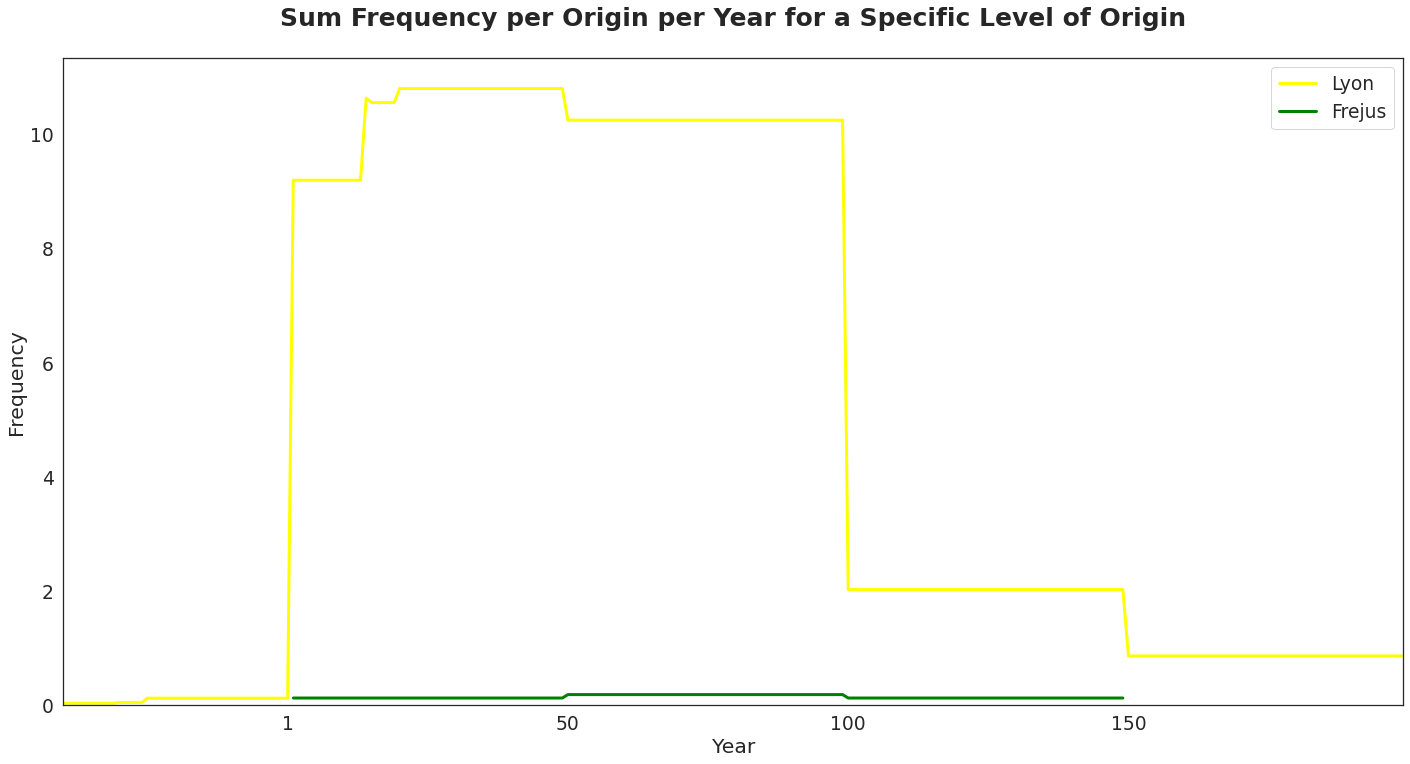

In [21]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['yellow', 'green'],  
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)

#Change background colour
ax.set_facecolor("white")  

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

ax.set_title(label = 'Sum Frequency per Origin per Year for a Specific Level of Origin', size=25, y=1.04, fontweight='bold')
plt.tight_layout()



# Save the graph
plt.savefig('./frequency_per_year.pdf')

### 9. Show count of *'Site'* per *'Contents'* per *'Year'* in RAAD date range

#### 9.1 To begin with a data frame is created with the counts

In [22]:
df0 = data.groupby(['RAAD_form', 'raad_type_start_date', 'raad_type_end_date', 'contents'])['site_name_modern'].apply(lambda x: ','.join(x))
df0 = df0.apply(lambda x: x.split(','))
df0 = df0.reset_index()
df0 = df0.rename(columns = {'site_name_modern':'List_of_sites'})
df0.head()

,RAAD_form,raad_type_start_date,raad_type_end_date,contents,List_of_sites
0,ac2,1.0,200.0,wine,[neuss book]
1,africana i,150.0,300.0,olive oil,"[augst, dieburg, groﬂgerau, mainz, strasbourg ..."
2,africana ii,150.0,300.0,olive oil,"[augst, bad kreuznach, mainz, bavay]"
3,africana iia grande keay 24,150.0,300.0,wine or fishsauce,"[mainz, strasbourg lhomme de fer, trier kaiser..."
4,africana iic,250.0,300.0,fish sauce,[strasbourg lhomme de fer]


#### 9.2 Count specific content types
This needs to be done for all the levels of contents that should be included in the final plot. If for example, you want three different contents (e.g., Wine, Olive oil, Unknown), three different site_count data frames should be made. 

In [23]:
site_count_wine = year_object_count_df(data = df0[df0['contents'] == 'wine'], 
                                       lower_date = 'raad_type_start_date',  
                                       upper_date = 'raad_type_end_date',
                                       object_list = 'List_of_sites')   

In [24]:
site_count_oil = year_object_count_df(data = df0[df0['contents'] == 'olive oil'], 
                                      lower_date = 'raad_type_start_date',  
                                      upper_date = 'raad_type_end_date',
                                      object_list = 'List_of_sites')   

#### 9.3 Plot the graphs

#### 9.3.1 Create a dictionary for plotting

In [25]:
df_dictionary = {'Wine': site_count_wine, 'Olive oil': site_count_oil}

#### 9.3.2. Plot and save

/tmp/ipykernel_37811/422829002.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


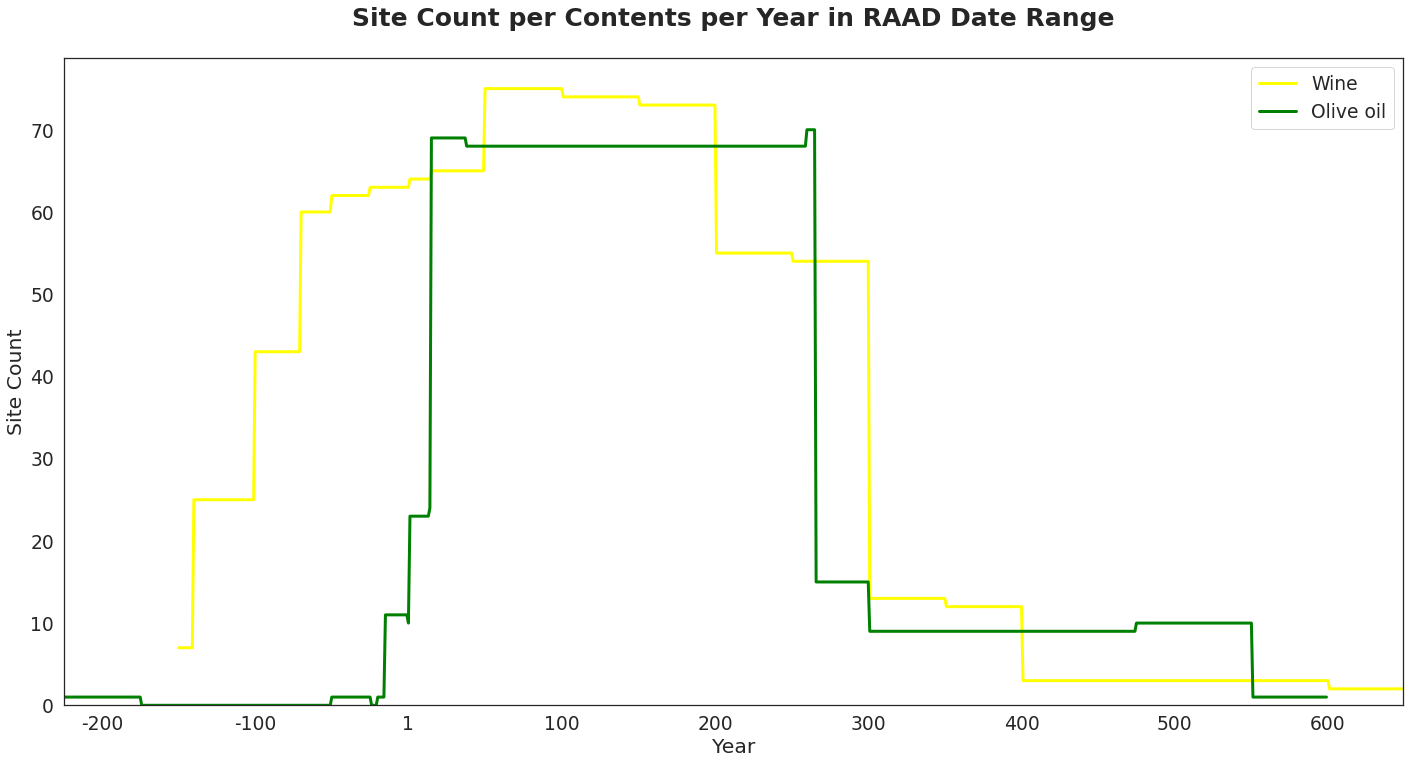

In [26]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['yellow', 'green'],  
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)

#Change background colour
ax.set_facecolor("white")  

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Site Count")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

ax.set_title(label = 'Site Count per Contents per Year in RAAD Date Range', size=25, y=1.04, fontweight='bold')
plt.tight_layout()



# Save the graph
plt.savefig('./site_count.pdf')

### 10. Show sum *'Frequency'* per *'Contents'* per *'Year'*

#### 10.1 To begin with the summed frequency is found

In [27]:
df0 = data.groupby(['contents', 'RAAD_form', 'raad_type_start_date', 'raad_type_end_date'])['frequency'].sum()
df0 = df0.reset_index()
df0 = df0.rename(columns = {'frequency':'Summed_freq'})
df0.head()

,contents,RAAD_form,raad_type_start_date,raad_type_end_date,Summed_freq
0,alum,richborough 527 augst 43,-50.0,200.0,66
1,defrutum or olives,haltern 70,-80.0,200.0,1148
2,defrutumolives,ha 70 sim,20.0,150.0,83
3,defrutumolives,london 555augst 21haltern 70 sim,20.0,150.0,158
4,fish sauce,africana iic,250.0,300.0,1


#### 10.2 Calculate of the summed frequency per year

In [28]:
df1 = sum_freq_per_year(data = df0,
                        sum_freq = 'Summed_freq',
                        lower_date = 'raad_type_start_date',
                        upper_date = 'raad_type_end_date')

#### 10.3 Create frequency dataframe with information about a certain content type

In [29]:
freq_wine = year_freq_df(data = df1[df1['contents'] == 'wine'],     
                         lower_date = 'raad_type_start_date',
                         upper_date = 'raad_type_end_date',
                         sum_freq = 'Sum_freq_per_year')   

In [30]:
freq_oil = year_freq_df(data = df1[df1['contents'] == 'olive oil'],     
                        lower_date = 'raad_type_start_date',
                        upper_date = 'raad_type_end_date',
                        sum_freq = 'Sum_freq_per_year')   

### 11. Plot the graphs

#### 11.1. Create a dictionary for plotting

In [31]:
df_dictionary = {'Wine': freq_wine, 'Olive oil': freq_oil}

#### 11.2. Plot and save

/tmp/ipykernel_37811/2359439641.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


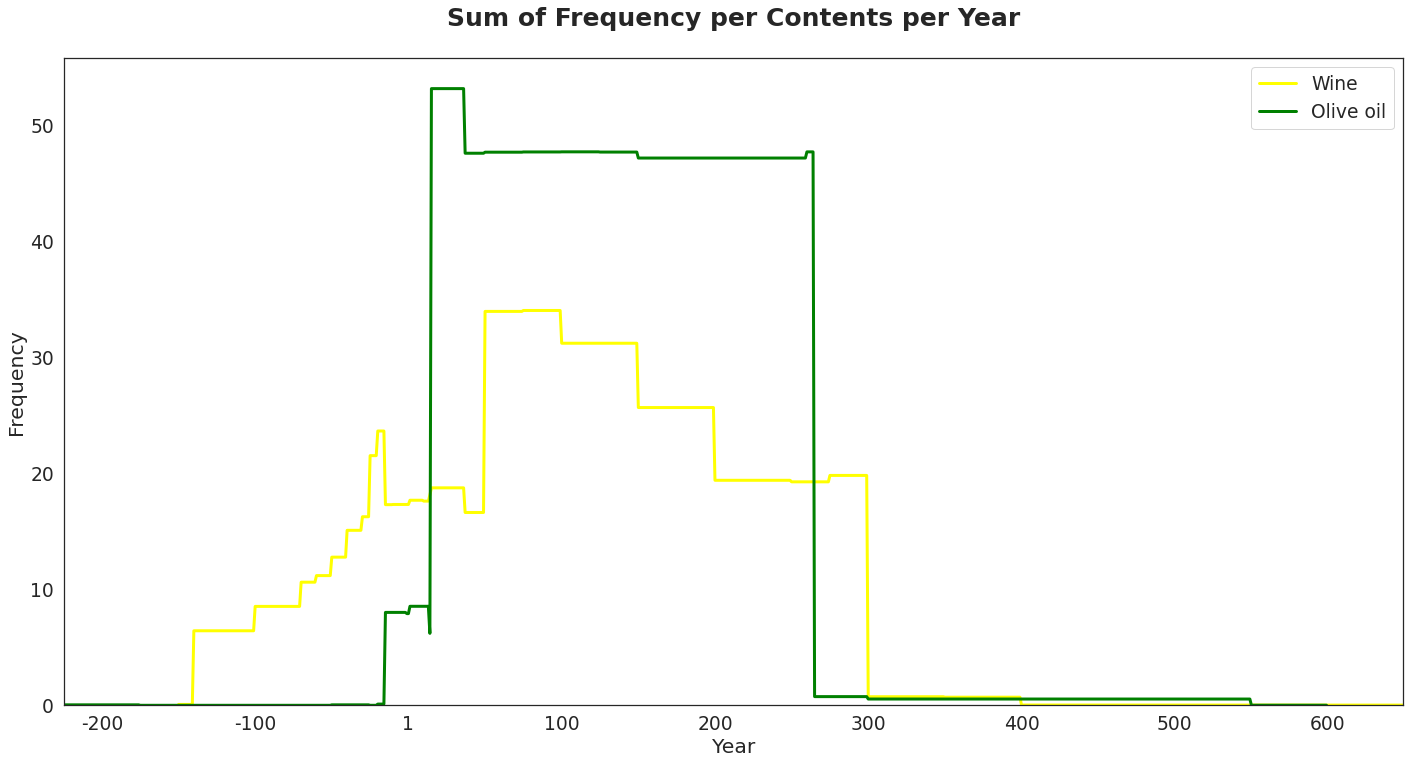

In [32]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['yellow', 'green'],  
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)

#Change background colour
ax.set_facecolor("white")  

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

ax.set_title(label = 'Sum of Frequency per Contents per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()



# Save the graph
plt.savefig('./Frequency_per_year.pdf')

### 12. Show count of unique *'RAAD type numbers'*  per *'Year'* in RAAD date range 

#### 12.1 Identify the list of RAAD type numbers per RAAD form

In [33]:
df0 = data.groupby(['RAAD_form', 'raad_type_start_date', 'raad_type_end_date', 'site_name_modern'])['RAAD_type_number'].apply(list)
df0 = df0.reset_index()
df0 = df0.rename(columns = {'RAAD_type_number':'List_of_numbers'})
df0.head()

,RAAD_form,raad_type_start_date,raad_type_end_date,site_name_modern,List_of_numbers
0,ac2,1.0,200.0,neuss book,[16]
1,africana i,150.0,300.0,augst,[166]
2,africana i,150.0,300.0,dieburg,[166]
3,africana i,150.0,300.0,groﬂgerau,[166]
4,africana i,150.0,300.0,mainz,[166]


#### 12.2 Count the number of unique RAAD type numbers per Year in RAAD date range

In [34]:
type_num_count = year_object_count_df(data = df0,  
                                      lower_date = 'raad_type_start_date',  
                                      upper_date = 'raad_type_end_date',
                                      object_list = 'List_of_numbers')   

#### 12.3 Create a dictionary for plotting

In [36]:
df_dictionary = {'RAAD Type Number': type_num_count}

#### 12.4 Plot and save

/tmp/ipykernel_37811/837784293.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


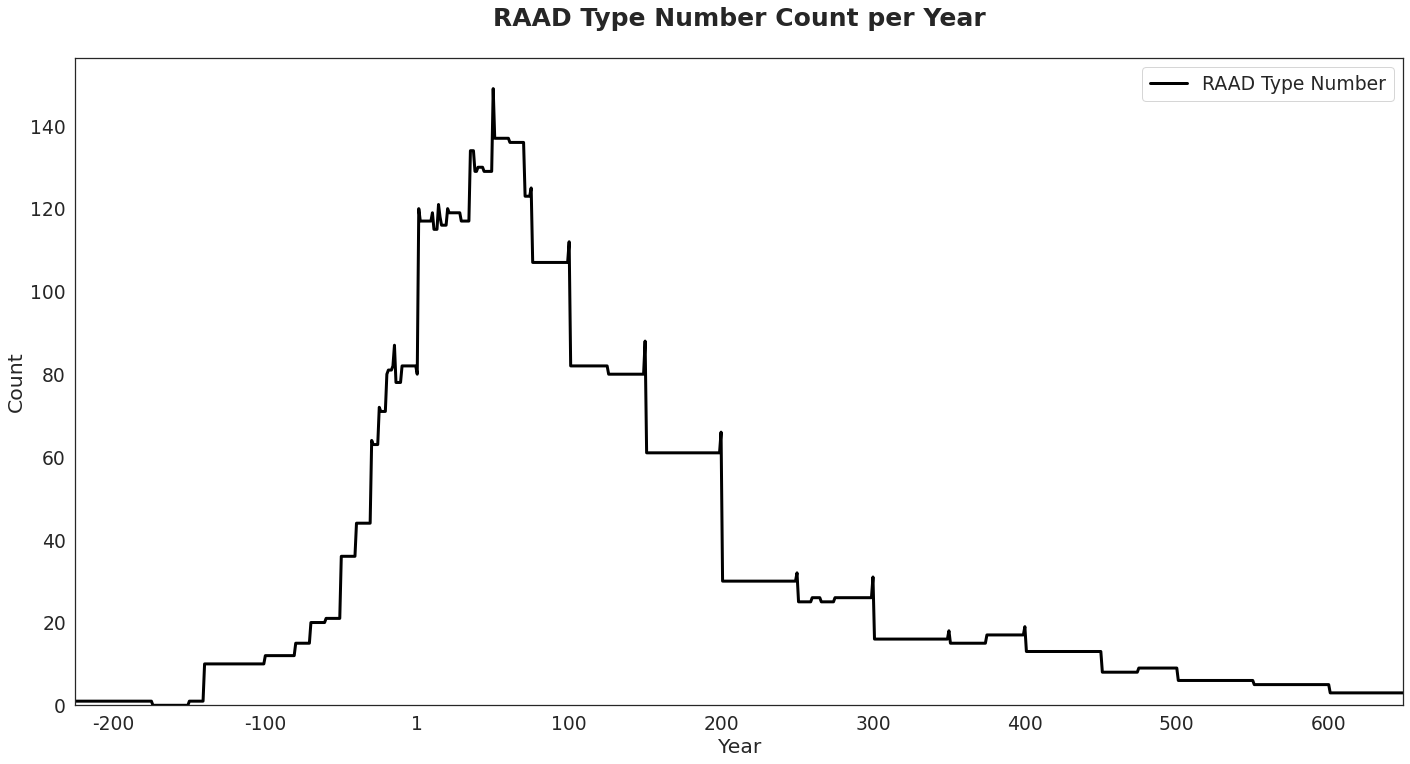

In [38]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['black'],  
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)

#Change background colour
ax.set_facecolor("white")  

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Count")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

ax.set_title(label = 'RAAD Type Number Count per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()


# Save the graph
plt.savefig('./count_per_year.pdf')

### 13. Show count of unique *'RAAD type numbers'*  per *'Year'* per *'Site'* in RAAD date range

#### 13.1 Identify the list of RAAD type numbers per RAAD form per Site

In [39]:
df0 = data.groupby(['RAAD_form', 'raad_type_start_date', 'raad_type_end_date', 'site_name_modern'])['RAAD_type_number'].apply(list)
df0 = df0.reset_index()
df0 = df0.rename(columns = {'RAAD_type_number':'List_of_numbers'})
df0.head()


,RAAD_form,raad_type_start_date,raad_type_end_date,site_name_modern,List_of_numbers
0,ac2,1.0,200.0,neuss book,[16]
1,africana i,150.0,300.0,augst,[166]
2,africana i,150.0,300.0,dieburg,[166]
3,africana i,150.0,300.0,groﬂgerau,[166]
4,africana i,150.0,300.0,mainz,[166]


#### 13.2 Count the number of unique RAAD type numbers per Year per certain Site

In [40]:
type_num_count_mainz  = year_object_count_df(data = df0[df0['site_name_modern'] == 'mainz'],  
                                             lower_date = 'raad_type_start_date',  
                                             upper_date = 'raad_type_end_date',
                                             object_list = 'List_of_numbers') 

#### 13.3 Create a dictionary for plotting

In [41]:
df_dictionary = {'Mainz': type_num_count_mainz}

#### 13.4 Plot and save

/tmp/ipykernel_37811/3082884803.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


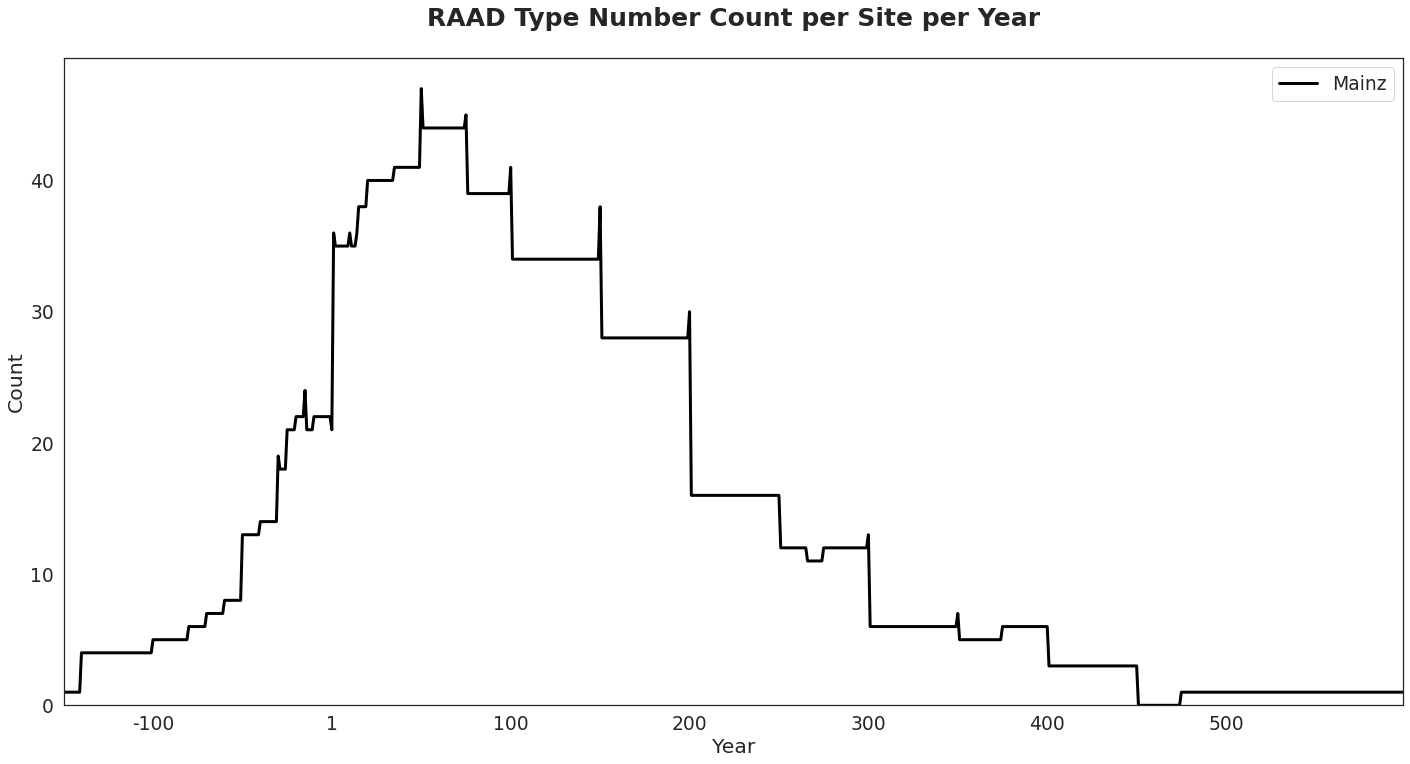

In [42]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['black'],  
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)

#Change background colour
ax.set_facecolor("white")  

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Count")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

ax.set_title(label = 'RAAD Type Number Count per Site per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()


# Save the graph
plt.savefig('./count_per_year.pdf')


### 14. Plot frequency of blank origin_2 variable

#### 14.1 Grouping data

Notice that here we are grouping both by origin_h1 and origin_h2


In [43]:
df0 = data.groupby(['origin_h1','origin_h2', 'RAAD_form', 'raad_type_start_date', 'raad_type_end_date'])['frequency'].sum()
df0 = df0.reset_index()
df0 = df0.rename(columns = {'frequency':'summed_freq'})
df0.head()

,origin_h1,origin_h2,RAAD_form,raad_type_start_date,raad_type_end_date,summed_freq
0,em,,augst 49,1.0,100.0,1
1,em,,augst 55 agora f6566,-50.0,400.0,12
2,em,,augst 56,300.0,450.0,2
3,em,,augst 57,400.0,500.0,1
4,em,,augst 59,300.0,450.0,1


The next chunk calculates the summed frequency per year. No need to alter anything here.

In [44]:
df1 = sum_freq_per_year(data = df0,
                        sum_freq = 'summed_freq',
                        lower_date = 'raad_type_start_date',
                        upper_date = 'raad_type_end_date')

df1.head()

,origin_h1,origin_h2,RAAD_form,raad_type_start_date,raad_type_end_date,summed_freq,Sum_freq_per_year
0,em,,augst 49,1.0,100.0,1,0.010101
1,em,,augst 55 agora f6566,-50.0,400.0,12,0.026667
2,em,,augst 56,300.0,450.0,2,0.013333
3,em,,augst 57,400.0,500.0,1,0.010000
4,em,,augst 59,300.0,450.0,1,0.006667


#### 14.2 Create a dataframe for each level of the variable
This needs to be done for all the levels of the variable that should be included in the final plot. In this example we are interested in plotting both according to origin_h1 and origin_h2. This is specified in the first line of code. Here we take the data where origin_h2 is empty and origin_h1 is 'gaul'.

In [45]:
Gaul_blank = year_freq_df(data = df1[(df1['origin_h2'] == '') & (df1['origin_h1']=='gaul')], 
                          lower_date = 'raad_type_start_date',
                          upper_date = 'raad_type_end_date',
                          sum_freq = 'Sum_freq_per_year')


Adriatic = year_freq_df(data = df1[df1['origin_h2'] == 'adriatic'], 
                        lower_date = 'raad_type_start_date',
                        upper_date = 'raad_type_end_date',
                        sum_freq = 'Sum_freq_per_year')  

In [46]:
df_dictionary = {'Southern Gaul': Gaul_blank, 'Adriatic': Adriatic}

/tmp/ipykernel_37811/584584527.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


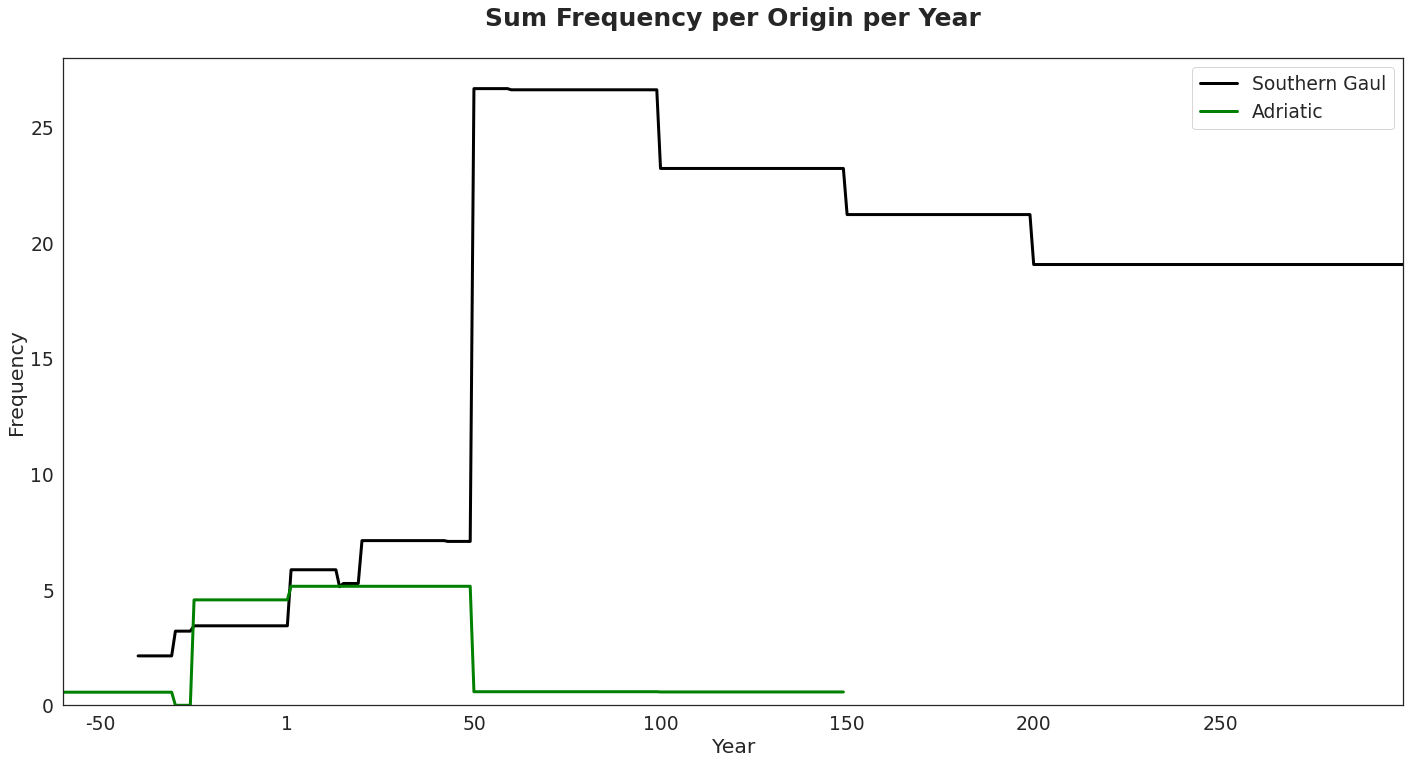

In [48]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['black', 'green'],  
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)

#Change background colour
ax.set_facecolor("white")  

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Frequency")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

ax.set_title(label = 'Sum Frequency per Origin per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()


# Save the graph
plt.savefig('./Frequency_per_year.pdf')


### 15. Plot count of blank origin 2 variable

#### 15.1 Creating dataframe
To begin with the data is grouped according to the query. 

In the below code, the first line is what needs alteration to fit the query. The use is most easily described by an example. 

Notice that here we are grouping both by origin_h1 and origin_h2.


In [49]:
df = data.groupby(['RAAD_form', 'raad_type_start_date', 'raad_type_end_date', 'origin_h1', 'origin_h2'])['site_name_modern'].apply(lambda x: ','.join(x))
df = df.apply(lambda x: x.split(','))
df = df.reset_index()
df = df.rename(columns = {'site_name_modern':'List_of_sites'})
df.head()

,RAAD_form,raad_type_start_date,raad_type_end_date,origin_h1,origin_h2,List_of_sites
0,ac2,1.0,200.0,em,crete,[neuss book]
1,africana i,150.0,300.0,northafrica,,"[augst, dieburg, groﬂgerau, mainz, strasbourg ..."
2,africana ii,150.0,300.0,northafrica,,"[augst, bad kreuznach, mainz, bavay]"
3,africana iia grande keay 24,150.0,300.0,northafrica,,"[mainz, strasbourg lhomme de fer, trier kaiser..."
4,africana iic,250.0,300.0,northafrica,,[strasbourg lhomme de fer]


#### 15.2 Create a dataframe for each level of the variable
This needs to be done for all the levels of the variable that should be included in the final plot. In this example we are interested in plotting both according to origin_h1 and origin_h2. This is specified in the first line of code. Here we take the data where origin_h2 is empty and origin_h1 is 'gaul'.

In [50]:
count_gaul= year_object_count_df(data = df[(df['origin_h2'] == '') & (df['origin_h1']=='gaul')], 
                                 lower_date = 'raad_type_start_date',  
                                 upper_date = 'raad_type_end_date',
                                 object_list = 'List_of_sites')  

In [51]:
count_adriatic= year_object_count_df(data = df[df['origin_h2'] == 'adriatic'], 
                                     lower_date = 'raad_type_start_date',  
                                     upper_date = 'raad_type_end_date',
                                     object_list = 'List_of_sites')  

#### 15.3 Plot the graphs
To begin with we create a dictionary for plotting which contains the above dataframes is made. The keys (what is incapsulated in '') are going to be the labels for the plot. The variables refered to, are the dataframes created just above. 

In [52]:
df_dictionary = {'Southern Gaul': count_gaul, 'Adriatic': count_adriatic}

Here the data from the previously created count data frames are plotted. 

This is done using the function `plotgraph()`. It needs you to specify the dictionary with the dataframes, xlabel, ylabel, title and optionally a path to where you want to save your plot. 

There are the following options for saving a plot:
1. One can specify where to save the plot. The path should be provided in `save_path`. F.ex., to save the resulting plot in the current directory use `save_path = './'`. 
2. One can omit the path specification. In this case, the function automatically creates a folder called `'fig'` in the current directory and saves the file into it.

**Note:** Don't forget to change the label.

/tmp/ipykernel_37811/966161447.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


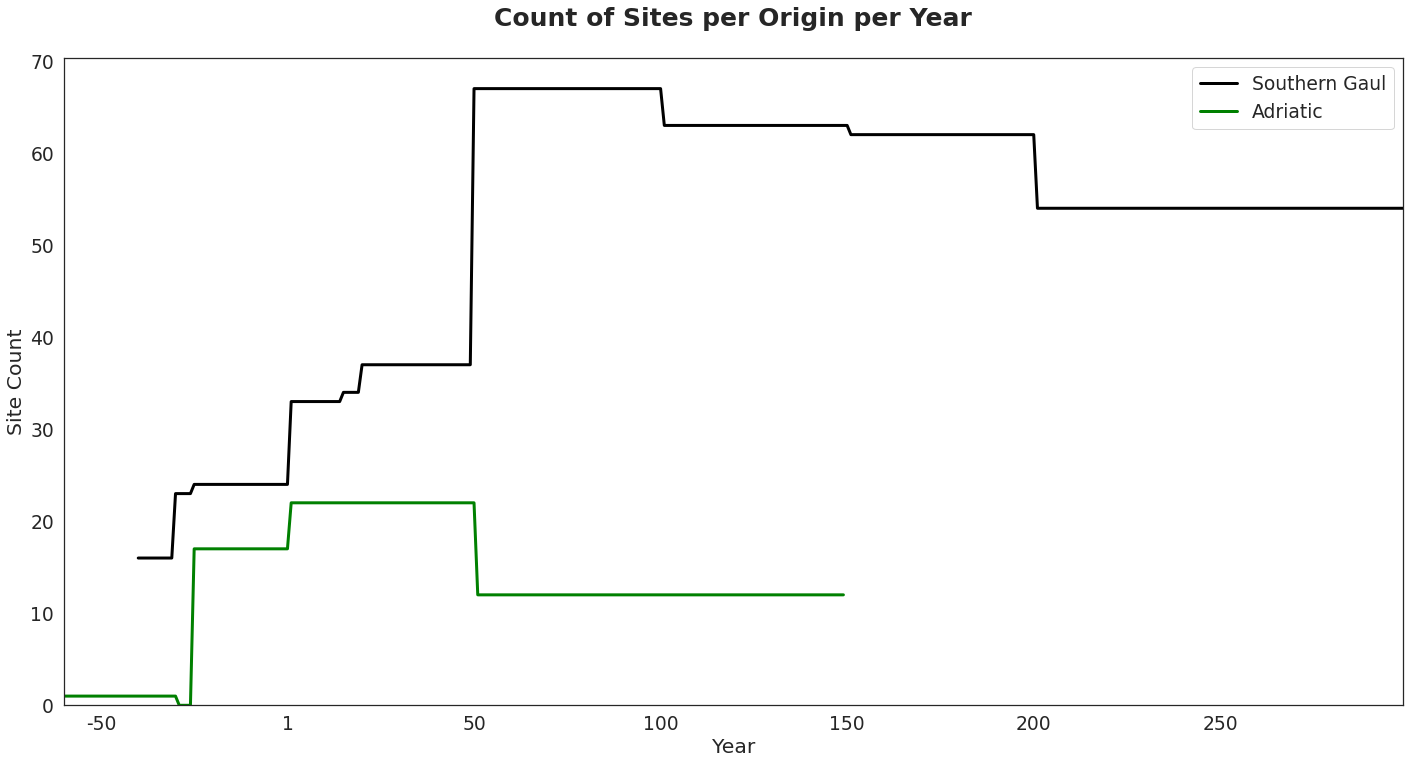

In [53]:
sns.set(font_scale=1.7)

#Remove squeres from background
sns.set_style(style='white')  

fig, ax = plt.subplots(figsize=(20, 11))

#Calculate minimum and maximum Y values to define the cuff off further
minimum, maximum = get_Y_range(df_dictionary)

plot_graph(dicts_of_df = df_dictionary,
           palette=['black', 'green'],  
           ax = ax)
           

# Cut off the range of Y value shown 
ax.set_xlim(minimum, maximum)

# Remove 0 from Y axis
ax.set_ylim(0, None)

#Change background colour
ax.set_facecolor("white")  

#Change Y values format 
# integers = '%.0f'
# decimals = '%.1f', the number before 'f' defines how many values to show after dot
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  

ax.set_ylabel("Site Count")
ax.set_xlabel("Year")

#To hide values on axis
#ax.axes.xaxis.set_ticks([])
#ax.axes.yaxis.set_ticks([])

# Make sure that if 0 is included on the x-axis it is turned into 1 instead
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

ax.set_title(label = 'Count of Sites per Origin per Year', size=25, y=1.04, fontweight='bold')
plt.tight_layout()


# Save the graph
plt.savefig('./site_count.pdf')
